# Vergleich-von-Messmethoden-fuer-Punktwolken

## Einleitung
Beim Scannen eines physischen Raumes mir einem 3D-Scanner ist das Ergebnis eine Punktwolke. Diese Punktwolke beschreibt dann ausgewählte Punkte im Raum, zum Beispiel auf den Wänden und der Decke.

Um die Genauigkeit des 3D-Scanners zu ermitteln werden in einem Testraum mehrere Punkte markiert. Diese Punkte befinden sich auf den Wänden, der Decke, oder auf Schränken. Die Markierten Punkte werden dann mit dem zu untersuchenden Scanner vermessen.

Es soll nun ermittelt werden, wie genau der 3D Scanner die Punkte im Raum vermessen konnte. Es soll bestimmt werden wie weit die Koordinaten des gemessenen Punktes von den orignialen Koordinaten des Scanners ist

Um die waren Koordinaten der Punkte zu ermitteln muss eine Referenzmessung durchgeführt werden.

Diese Vermessung sollte mit einem möglicht genauen Gerät gemacht werden. Eine Möglichkeit wäre ein Tachymeter wie die "Totalstation" von CST Berger.

Wenn man nun aber die Koordinatender beiden Punktwolken vergleichen will wird ein Problem deutlich.

Die beiden 3D Messgeräte haben kein gemeinsames Koordinatensystem. Durch einen Sensor im Gerät kann meist die xy-Ebene waagerecht festgelegt werden. Jedoch muss davon ausgegangen werden , dass sich
sowohl Zentrum, als auch Ausrichtung unterscheiden.

Im folgenden Bild sind zwei Punktwolken dargestellt. Beide Punktwolken beschreiben die gleichen Messpunkte, gemessen mit zwei unterschidlichen 3D Scannern. Es ist zu erkennen, dass die Ausrichtung und Position der Punktwolken nicht übereinstimmt.

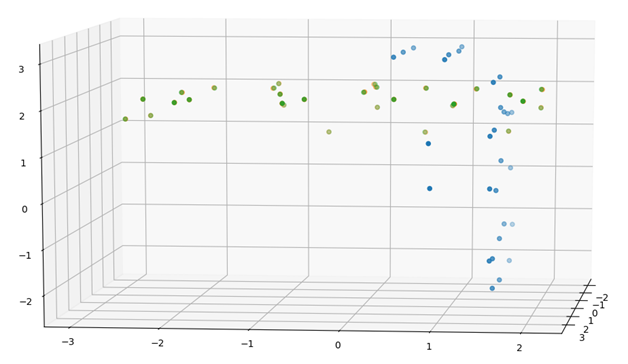

  *Zwei Punktwolken mit jeweils 40 Punkten*

Um die, vom zu untersuchenden 3DScanner gemessene Punktwolke mit der Referenzpunktwolke vergleichen zu können gibt es nun zwei verschiedene Methoden.

Ich nenne diese Methoden, die *direkte Methode* und die *indirekte Methode*

## Die Methoden
Jeder 3D Scanner kann die Koordinaten der Punkte nur relativ zu seinem Internen Koordinatensystem ausgeben. Die Null-koordinaten der zu untersuchenden Scanner sind bei ihren Scans nicht im selben Punkt und auch die Ausrichtung wird sich unterscheiden. Dies stellt ein Problem dar, da die Koordinaten der jeweiligen Punkte so nicht direkt verglichen werden können.

### Die indirekte Methode
Um die Punktwolken trotzdem vergleichen zu können wird ein Trick angewendet. Anstatt die XYZ-Koordinaten zu vergleichen werden stattdessen Abstände zwischen allen Punkten innerhalb einer Punktwolke ausgerechnet. Bei 40 Punkten ergeben das dann nach der Formel 
$ N = \frac{n*(n-1)}{ 2}$

780 Strecken.

Mit der Formel 

$ d = \sqrt{ (x_1-x_2)^2+(y_1-x_2)^2+(z_1-z_2)^2  } $

werden die Distanzen ausgerechnet

Um den Fehler für jede einzelne Strecke ausrechnen zu können wird der wahre Wert für die Strecke gebraucht. 
Es wird die Annahme gemacht, dass die Fehler der Referenzmessung viel kleiner sind (<<) als die des Untersuchten Gerätes.

$ absoluterFehler_i = berechneteDistanz_i – wahrererWert_i $

Der gewichtete Fehler für alle Punkte ist damit:

$ RMSE = \sqrt{\frac{1}{N}\sum{absoluterFehler_i^2}}  $


### Die direkte Methode
Bei der direkten Methode wird versucht eine der Punktwolken so zu drehen, dass sie möglichst gut mit der anderen übereinstimmt.
Es wird versucht die Distanz zwischen den koresponierenden Punkten der zwei Punktwolken zu minimieren.
Auf http://nghiaho.com/?page_id=671  wird der Algorithmus sehr gut erklärt.([code](https://github.com/nghiaho12/rigid_transform_3D) auf github)
Hierfür ist es wichtig, dass die Arrays, in denen die Punkte gespeichert sind gleich sortiert sind. Das bedeutet, die korrespondierenden Punkte haben den gleichen index.

Danach können die Positionen der Punkte miteinander verglichen werden.

$ d_i = \sqrt{ (x_1-x_2)^2+(y_1-x_2)^2+(z_1-z_2)^2  } $

i entspricht dem index des Punktes
$ (x_1 y_1 z_1) $ ist der ite Punkt der Referenzmessung
$ (x_2 y_2 z_2) $ ist der ite Punkt der zu untersuchenden Messung
$d_i $ entspricht dem Abstand des gemessenem Punkts zur wahren Position des Punktes, und damit dem Fehler, den der Scanner gemacht hat

Der RMSE berechnet sich dann wie folgt

$ RMSE = \sqrt{\frac{1}{N}\sum{d_i^2}}  $





## Die Untersuchung
Im Folgenden soll nun in verschidenen Szenarien die Genauigkeit einer Punktwolke gegenüber der Referenzmessung mit beiden Methoden bestimmt werden.
Dann kann die Differenz dieser beiden Genauigkeiten gebildet werden. So kann festgestellt werden, ob beide Methoden den gleichen Wert liefern.

Es werden in einem Raum von *$10m^3$* zufällig Punkte genereiert.
Die Anzahl der Punkte soll möglichst groß sein, jedoch soll die Laufzeit nicht zu lange sein.
Bei der Rechenpower meiner CPU (i5 6600K 4Kerne) (übertaktet auf 4,6GHz ;) sind das circa *1000* Punkte.

Diese Punkte stellen den Wahren Wert dar, und damit die Referenzmessung.
Auf die Punkte der Referenzmessung wird in alle 3 Koordinatenrichtungen ein zufälliger Fehler addiert. Dies Simuliert einen zweiten Scan mit einem ungenaueren 3D Scanner.

Dann wird mit beiden, oben beschriebenen Methoden der RMSE (Root Mean Squared Error) berechnet.

Nun kann untersucht werden, wie sich dei beiden Methoden unterscheiden.
Die direkte Methode ist die natürlichere, daher wird sie für den Vergleich als basis gewählt.

Für alle folgenden Untersuchungen wird berechnet um wie viel Proztent der berechnete RMSE der indirekten Methode größer ist, als der der direkten Methode. Dies geschieht mit der Formel:

$ RMSEdiffRelative = \frac{ RMSE_{direct} - RMSE_{indirect}}{RMSE_{direct}} $

Alle werte sind in milli Meter (mm).



### Prognose
Folgende Effekte könnten eine Auswirkung auf die Differenz haben:

- der Absolute fehler der Untersuchten Punktwolke
- durch den RMSE werden größere Werte stärker gewichtet 
- die Punkte sind nicht gleichmäßig verteilt (nur in einer Ebene)
- der Fehler ist nicht gleich groß in alle Achsrichtungen

In verschiedenen Szenarios sollen diese Effekte untersucht werden

### Simulationen

In [ ]:
# imports and test of python
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from mpl_toolkits.mplot3d import Axes3D
from statistics import mean
from scipy import spatial

print("Python works")

In [ ]:
#Klasse für Hilfsfunktionen
class Pointclouds():
    def __init__(self):
        pass

    def createPointcloud(self, roomDimension, numberOfPoints):
        lenX, lenY, lenZ = roomDimension
        
        points = np.column_stack((random.uniform(0.0, lenX, numberOfPoints),random.uniform(0.0, lenY, numberOfPoints),random.uniform(0.0, lenZ, numberOfPoints)))
        
        return points

    def addError(self, points, sigma, distribution = 'normal'):
        # adding some error to the referenc Pointcloud to simulate a second measurement with a less accurate scanner
        if distribution == 'normal':
            otherpoints = points + random.normal(0.0, sigma, np.shape(points))
        elif distribution == 'uniform':
            otherpoints = points + random.uniform(-sigma, sigma, np.shape(points))
        return otherpoints

    def addUnevenError(self, points, sigmaX,sigmaY,sigmaZ):
        n = np.shape(points)[0]
        noise = np.column_stack((random.normal(0.0, sigmaX, n),random.normal(0.0, sigmaY, n),random.normal(0.0, sigmaZ, n)))
        otherpoints = points + noise
        return otherpoints

    def addErrorWithOffset(self, points, sigma, offset):
        otherpoints = points + random.normal(offset, sigma, np.shape(points))
        return otherpoints

    def calcErrorDiff(self, PointcloudA, PointcloudB): #return RMSEdiffRelative
        # Calculate RMSE with both methods
        # direkt method
        ## rigid body transform is not needed, because in this simulations the coordinate systems are the same for both scans
        errorVectors = PointcloudA - PointcloudB                #distances of the coresponding points
        #calc length of error vector
        errorDistances = np.linalg.norm(errorVectors, axis=1)              

        RMSE_direct = np.sqrt(mean(pow(errorDistances,2)))                      

        # indirekt method
        distancesA = spatial.distance.pdist(PointcloudA)
        distancesB = spatial.distance.pdist(PointcloudB)
        distErrors =  distancesB - distancesA
        RMSE_indirect =np.sqrt(mean(pow(distErrors,2)))

        RMSEdiffRelative = (RMSE_indirect - RMSE_direct )/RMSE_direct  # the RMSE_indirect is (RMSEdiffRelative * 100) % bigger than the RMSE_direct
        return [RMSEdiffRelative , RMSE_direct, RMSE_indirect]                                        # or return [RMSEdiffRelative , RMSE_direct, RMSE_indirect] 

def rmse(individualErrors):
    return np.sqrt(mean(individualErrors ** 2))

print("Hilfsklasse erstellt")
    

In [ ]:

pts = Pointclouds() #objekt for helpfunctions
numberOfPoints = 1000 #may be different for different szenarios

### Szenario 0: Grundsätzliche Untersuchung
Zuerst soll untersucht werden, ob die oben beschriebene Methode gute Werte liefert.
Dafür werden 200 Punkte genereiert.
Die zweite Punktwolke soll einen normalverteilten Fehler mit der Standardabweichung von 50mm haben.

Der gleiche versuch wird 100 mal durchgeführt. 
Das Ergebnis für die Differenz der beiden Methoden sollte ungefähr gleich bleiben.


In [ ]:
################ Validation Test
 #   - 10m3Raum
#       - normalverteilter Fehler 50mm  np.random.normal()
#       - das gleiche nochmal, kommt das gleiche Ergebnis heraus

numberOfPoints = 200
error = 50    #mm   standardabweichung des normalverteilten Fehlers
#errors = [50 for _ in range(1, 102, 10)]
rounds = [x for x in range(1, 101, 1)]  # 100 trys
diffs = []
for round in rounds: 
    points = pts.createPointcloud((10_000.0, 10_000.0, 10_000.0), numberOfPoints)
    otherPoints = pts.addError(points, error, distribution = 'normal')
    diffs.append(pts.calcErrorDiff(points, otherPoints))
diffs = np.array(diffs)

plt.figure()
plt.scatter(rounds, diffs[:, 0])
plt.title("100 times with normal distribution")
plt.xlabel('rounds')
plt.ylabel('diff of the to methods')
plt.show()

**Auswertung:**
Dieser Graph zeigt uns, dass der, mit der indirekten Methode berechnete, RMSE um circa 18 % kleiner ist, als der RMSE, der mit der direkten Methode berechnet wurde.
Bei 200 Punkten liegn alle Punkte in einem Bereich von +-3%
Diese streuung ist nicht perfekt, aber sie ist ausreichend klein, um weiter zu forschen

Die Anzahl der Punkte sollte aber nicht reduziert werden, denn bei 40 Punkten liegt die streuung schon bei +-6%

Mehr Punkte im Raum helfen aber, jedoch ist die Rechenzeit dann deutlich größer.

**Absoluter Wert der beiden RMSEs**

Nun wollen wir uns den Absoluten Wert des RMSE anschauen:
Da alle werte simuliert werden, kann untersucht werden, was der RMSE der beiden Methoden überhaupot bedeutet:
Auf die zweite Punktwolke wird ein Normalverteilter Fehler, mit einer Standardabweichung von 50mm, in alle drei Achsrichtungen addiert.
Dies entspricht dem Messfehler des 3D-Scanners für jeden einzelnen Punkt.

Als RMSE für die gesamte Messung ergibt sich (in diesem Fall):

In [ ]:
print("averageRMSE_direct:   ", np.mean(diffs[:, 1]))
print("averageRMSE_indirect: ", np.mean(diffs[:, 2]))

**averageRMSE_direct**     müsste ungefähr 86mm sein

**averageRMSE_indirect**   müsste ungefähr 70mm sein

Dies ist interessant:

Man nehme ein array aus normalverteiltem Fehler, mit Standardabweichung von *x*. Der RMSE dieses arrays sollte ungefähr gleich der Standardabweichung sein. Siehe Python code unterhalb.



In [ ]:
numberOfValues = 100_000
standardabweichung = 50

rmse(np.zeros(numberOfValues) + random.normal(0.0, standardabweichung, numberOfValues))

versuche diesen Code auch gerne mal mit nur 200 Werten

**Erklärung:** Der höhere Wert kommt daher, dass zwei verrauschte werte addiert werden. Siehe code unten

In [ ]:
numberOfValues = 100_000
standardabweichung = 50
valuesA = np.zeros(numberOfValues) + random.normal(0.0, standardabweichung, numberOfValues)
valuesB = np.zeros(numberOfValues) + random.normal(0.0, standardabweichung, numberOfValues)
rmse(valuesA + valuesB)    # hier ist es egal, ob (valuesA + valuesB) oder (valuesA - valuesB)

Dies ist der gleiche wert, wie bei der indirekten Methode.
Ich kann mir momentan noch nicht erklären, warum der Wert der direkten Methode größer ist.
Ähm ich meine: 
> Diese Frage zu beantworten, ist offen gelassen als Aufgabe für den Leser!

### Szenario 1: Auswirkung des individuellen Fehlers
Für das vorherige Szenario war die Standardabweichung des Fehlers, der auf jeden einzelnen Punkt des zweiten Scanns addiert wird, 50mm.

Nun soll untersucht werden, ob diese Standardabweichung einen einfluss auf die differenz der beiden Methoden hat

In [ ]:
################ First Test
#   - 10m3Raum
#   - normalverteilter Fehler mit variierender Standardabweichung von 1mm bis 100 mm

numberOfPoints = 200 
errors = [x for x in range(1, 101, 1)] #mm   standardabweichung des normalverteilten Fehlers
diffs = []
for round in rounds: 
    points = pts.createPointcloud((10_000.0, 10_000.0, 10_000.0), numberOfPoints)
    otherPoints = pts.addError(points, error, distribution = 'normal')
    diffs.append(pts.calcErrorDiff(points, otherPoints))
diffs = np.array(diffs)

plt.figure()
plt.scatter(errors, diffs[:, 0])
plt.title("100 times with different sigma")
plt.xlabel('sigma in mm')
plt.ylabel('diff of the to methods')
plt.show()

**Interprätation:** Es scheint, dass die Standardabweichung, in diesem Fall, keinen einfluss auf die Differenz der beiden Methoden hat.

### Szenario 2: ungleichmäßig verteilte Punkte
In Scenario 1 waren die punkte gleichmäßig in dem $10m^3$ Raum verteilt.
In einem realen Raum aber, ist es viel wahrscheinlicher, dass die gemessenen Punkte auf einer Ebene liegen, wie eben der Decke, oder den Wänden.

Dies soll nun untersucht werden.

In [ ]:
################ Second Test
#   - Punkte nur auf XY-Ebene 10m^2
#   - normalverteilter Fehler mit Standardabweichung 50mm

numberOfPoints = 200
error = 50    #mm   standardabweichung des normalverteilten Fehlers
rounds = [x for x in range(1, 101, 1)]  # 100 rounds
diffs = []
for round in rounds: 
    points = pts.createPointcloud((10_000.0, 10_000.0, 0), numberOfPoints)
    otherPoints = pts.addError(points, error, distribution = 'normal')
    diffs.append(pts.calcErrorDiff(points, otherPoints))
diffs = np.array(diffs)

plt.figure()
plt.scatter(rounds, diffs[:, 0])
plt.title("100 times with points on XY-Plane")
plt.xlabel('rounds')
plt.ylabel('diff of the to methods')
plt.show()

**Interprätation:** Aus dem Graph oben wird sichtbar, dass das untersuchte Phänomen keine Auswirkung auf die Differenz der beiden Methoden hat.

### Szenario 3: ungleichmäßig verteilter Fehler
Bei einem realen 3D Scanner kann es vorkommen, dass der Messfehler nicht gleichmäßig in alle Richtungen verteilt ist.

Im folgenden Experiment soll also nun der Fehler in z-Richtung "faktor" mal größer sein als der Fehler in x und y Richtung.

In [ ]:
################ Third Test
#   - 10m^3 Raum
#   - normalverteilter Fehler mit Standardabweichung 50mm
#   - Fehler in z-Richtung "faktor" mal größer als der Fehler in x und y Richtung.

numberOfPoints = 500
error = 50    #mm   standardabweichung des normalverteilten Fehlers
faktors = [x for x in np.arange(0.1,5,0.1)]
diffs = []
for faktor in faktors: 
    points = pts.createPointcloud((10_000.0, 10_000.0, 0), numberOfPoints)
    otherPoints = pts.addUnevenError(points, error, error, error*faktor)
    diffs.append(pts.calcErrorDiff(points, otherPoints))
diffs = np.array(diffs)

plt.figure()
plt.scatter(faktors, diffs[:, 0])
plt.title("uneven Error in z direction")
plt.xlabel('faktor')
plt.ylabel('diff of the to methods')
plt.show()

**Interprätation:** Bei einem Faktor von 1 ist die differenz wie zu erwarten bei ungefähr -18%.

Bei einem Faktor von 0 (Fehler ist nur in der XY-Ebene)gibt es keinen Unterschied zwischen den beiden Methoden.

Wenn der Fehler in Z-Richtung 5 mal größer ist, als in der XY-Ebene, dann ergibt sich ein Unterschied von circa -70%.
Der RMSE der indirekten Methode ist um 70% kleiner, als der der direkten Methode.

In [ ]:
print("RMSE_direct   with faktor 5: ", diffs[-1, 1])
print("RMSE_indirect with faktor 5: ", diffs[-1, 2])

### Szenario 4: Punkte auf Ebene und ungleichmäßig verteilter Fehler
Dies ist eine Kombination aus Szenario 2 und Stenario 3

Es soll untersucht werden, was passiert, wenn die gemessenen Punkte nur auf einer Ebene verteilt sind und der Fehler nicht gleichmäßig in alle drei Achsen verteilt ist.

Es wird sich ein unterschiedliches Verhalten zeigen, ob der größere Fehler innerhalb der Ebene ist , oder ob er orthogonal zur ebene ist.

Im folgenden Versuch sind die Messpunkte im Raum nur auf einer Ebene verteilt.
Der Fehler in eine bestimmte Achsrichtung wird dann schrittweise um einen gewissen Faktor erhöht.

In [ ]:
############### Fourth Test

#   - Punkte nur in XY ebene Verteilt 10m2
#     - Fehler nur in x Richtung
#     - Fehler nur in y Richtung
#     - Fehler nur in z Richtung

numberOfPoints = 1000
plt.figure()
error = 50
diffs = []
faktors = range(1, 10, 1)

for faktor in faktors: 
    points = pts.createPointcloud((10_000.0, 10_000.0, 0.0), numberOfPoints)
    otherPoints = pts.addUnevenError(points, error*faktor, error, error)
    diffs.append(pts.calcErrorDiff(points, otherPoints))
plt.scatter(faktors, np.array(diffs)[:,0], label = '#X', color = 'navy')

diffs = []
for faktor in faktors: 
    points = pts.createPointcloud((10_000.0, 10_000.0, 0.0), numberOfPoints)
    otherPoints = pts.addUnevenError(points, error, error*faktor, error)
    diffs.append(pts.calcErrorDiff(points, otherPoints))
plt.scatter(faktors, np.array(diffs)[:,0], label = '#Y', color = 'red')

diffs = []
for faktor in faktors: 
    points = pts.createPointcloud((10_000.0, 10_000.0, 0.0), numberOfPoints)
    otherPoints = pts.addUnevenError(points, error, error, error*faktor)
    diffs.append(pts.calcErrorDiff(points, otherPoints))
plt.scatter(faktors, np.array(diffs)[:,0], label = '#Z', color = 'darkcyan')


plt.scatter(faktors, np.array(diffs)[:,0])
plt.title("1000 Points on XY Plane")
plt.xlabel('error in # axes is _ times bigger than other')
plt.ylabel(r'distRMSE is y% smaller than RMSE')
plt.legend(loc = "lower left")
plt.show()

# Abschluss
**Danke** für das lesen dieses Notebooks.\
Ich hoffe es hat dir gefallen, und du hast etwas gelernt.

Spiel gerne auch etwas mit dem code herum,\
verändere numberOfPoints,\
oder schaue dir die absoluten Werte für den RMSE an

**Like** wenn es dir gefallen hat\
**kommentiere**, wenn du einen Fehler gefunden hast.